In [48]:
import pandas as pd
from youtube_comment_downloader import YoutubeCommentDownloader
def scrape_youtube_comments(video_url):
    
    downloader = YoutubeCommentDownloader()
    comments = downloader.get_comments_from_url(video_url)
    
    data = []

    for comment in comments:
        comment_data = {
            'text': comment.get('text', ''),
            'author': comment.get('author', ''),
            'likes': comment.get('votes', 0),
            'time': comment.get('time', ''),
        }
        data.append(comment_data)

    # Create a DataFrame from the list
    df = pd.DataFrame(data)
    
    return df

In [49]:
video_url = 'https://www.youtube.com/watch?v=hjh08lEpTzw'
df = scrape_youtube_comments(video_url)

In [50]:
df.likes = df.likes.astype(int)

In [51]:
df.head()

,text,author,likes,time
0,Which European union nationality is best?,@HashirRayanLimitless,0,قبل 5 ساعات
1,Lee Paul Smith Ruth Garcia Susan,@WendyPennell-j7g,0,قبل يومين
2,And I hear that if you want to get-the hell ou...,@6648rome,0,قبل 6 أيام (تم تعديله)
3,Awesome🎉,@Ardaandmom,0,قبل 7 أيام
4,I have the Colombian passport by birth and the...,@claudiam427,0,قبل 8 أيام


In [52]:
df[df['text'].str.contains('@', case=False)]

,text,author,likes,time
23,@nomadcapitalist thank you kindly!,@mikejr1152,0,قبل 13 يومًا
70,@SkullTraill Name one legitimate reason for...,@harryniedecken5321,0,قبل 3 أسابيع (تم تعديله)
72,​ @Blueskies1180 He's not an intellectual/int...,@lovely_pariah,6,قبل 3 أسابيع
75,@einnnor How many do you have?,@dadada396,0,قبل 4 أيام (تم تعديله)
98,"​ @alchemira , stop watching news from Rio (un...",@gandhinho5466,3,قبل 3 أسابيع
...,...,...,...,...
547,"@Bearjew613 Hey, wait a minute...isn't that ...",@ruralsquirrel5158,2,قبل شهرين
548,@ruralsquirrel5158 I mean the Arab countries...,@Bearjew613,3,قبل شهرين
551,@2ASHKENAZI It's funny but unfortunatly true,@The-Cat,0,قبل شهر واحد
554,We generally get hired to handle more difficul...,@nomadcapitalist,2,قبل شهرين


In [55]:
df[df['text'].str.contains(' ', case=False)]

,text,author,likes,time
23,@nomadcapitalist thank you kindly!,@mikejr1152,0,قبل 13 يومًا
70,@SkullTraill Name one legitimate reason for...,@harryniedecken5321,0,قبل 3 أسابيع (تم تعديله)
72,​ @Blueskies1180 He's not an intellectual/int...,@lovely_pariah,6,قبل 3 أسابيع
75,@einnnor How many do you have?,@dadada396,0,قبل 4 أيام (تم تعديله)
98,"​ @alchemira , stop watching news from Rio (un...",@gandhinho5466,3,قبل 3 أسابيع
...,...,...,...,...
546,@2ASHKENAZI but Israel is terrorist state an...,@fhfh1589,0,قبل شهرين
547,"@Bearjew613 Hey, wait a minute...isn't that ...",@ruralsquirrel5158,2,قبل شهرين
548,@ruralsquirrel5158 I mean the Arab countries...,@Bearjew613,3,قبل شهرين
551,@2ASHKENAZI It's funny but unfortunatly true,@The-Cat,0,قبل شهر واحد


In [86]:
# remove links, hashtags, mentions
df['text'] = df['text'].str.replace(r'http\S+', '', case=False)
df['text'] = df['text'].str.replace(r'www\S+', '', case=False)
df['text'] = df['text'].str.replace(r'@\S+', '', case=False)
df['text'] = df['text'].str.replace(r'#\S+', '', case=False)
df['text'] = df['text'].str.replace(r' ', '', case=False)
df.head()

,text,author,likes,time
0,Which European union nationality is best?,@HashirRayanLimitless,0,قبل 5 ساعات
1,Lee Paul Smith Ruth Garcia Susan,@WendyPennell-j7g,0,قبل يومين
2,And I hear that if you want to get-the hell ou...,@6648rome,0,قبل 6 أيام (تم تعديله)
3,Awesome🎉,@Ardaandmom,0,قبل 7 أيام
4,I have the Colombian passport by birth and the...,@claudiam427,0,قبل 8 أيام


In [87]:
df[df['text'].str.contains(' ', case=False)]

,text,author,likes,time


In [88]:
df

,text,author,likes,time
0,Which European union nationality is best?,@HashirRayanLimitless,0,قبل 5 ساعات
1,Lee Paul Smith Ruth Garcia Susan,@WendyPennell-j7g,0,قبل يومين
2,And I hear that if you want to get-the hell ou...,@6648rome,0,قبل 6 أيام (تم تعديله)
3,Awesome🎉,@Ardaandmom,0,قبل 7 أيام
4,I have the Colombian passport by birth and the...,@claudiam427,0,قبل 8 أيام
...,...,...,...,...
567,Guess first thing is to get rich then,@Muiscfromthealps,5,قبل شهرين
568,This channel is not for normal people,@the_expidition427,9,قبل شهرين
569,More lisp pleize boize.,@GeeBee-wy8rb,0,قبل شهرين
570,Hello 👋,@nomadcapitalist,2,قبل شهرين


In [89]:
from transformers import pipeline
sentiment_analyzer = pipeline("sentiment-analysis", model="j-hartmann/emotion-english-distilroberta-base")

In [90]:
print(df['text'][3])
sentiment_analyzer(df['text'][3])

Awesome🎉


[{'label': 'joy', 'score': 0.608202338218689}]

In [92]:
df['text'] = df['text'].apply(lambda x: x if len(x) < 512 else x[:512])

In [93]:
df['sentiment'] = df['text'].apply(lambda x: sentiment_analyzer(x)[0]['label'])

In [94]:
df.head()

,text,author,likes,time,sentiment
0,Which European union nationality is best?,@HashirRayanLimitless,0,قبل 5 ساعات,neutral
1,Lee Paul Smith Ruth Garcia Susan,@WendyPennell-j7g,0,قبل يومين,neutral
2,And I hear that if you want to get-the hell ou...,@6648rome,0,قبل 6 أيام (تم تعديله),anger
3,Awesome🎉,@Ardaandmom,0,قبل 7 أيام,joy
4,I have the Colombian passport by birth and the...,@claudiam427,0,قبل 8 أيام,sadness


In [95]:
df['sentiment'].value_counts()

sentiment
neutral     344
joy          53
sadness      51
surprise     48
anger        32
fear         23
disgust      21
Name: count, dtype: int64

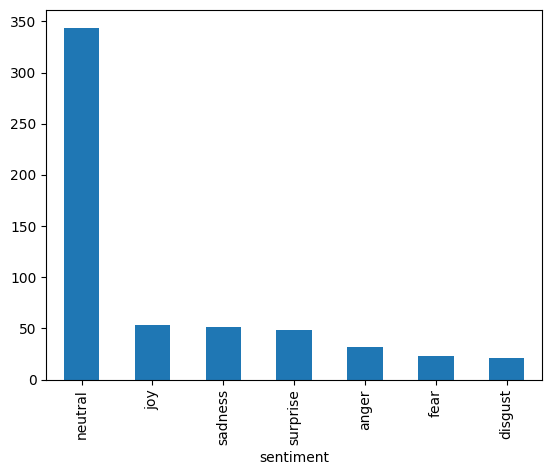

In [96]:
# plot sentiment distribution
import matplotlib.pyplot as plt
df['sentiment'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
df.to_csv('sentiment_analysis_youtube_comments.csv', index=False)